In [205]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj1.ok')

Assignment: proj1
OK, version v1.13.11



# Project 1: Food Safety 
## Cleaning and Exploring Data with Pandas
## Due Date: Tuesday 2/12, 6:00 PM
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *SeungHugh Jeong*


## This Assignment
<img src="scoreCard.jpg" width=400>

In this project, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health. The main goal for this assignment is to understand how restaurants are scored. We will walk through various steps of exploratory data analysis to do this. We will provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Applying probability sampling techniques
* Exploring characteristics and distributions of individual variables

## Score Breakdown
Question | Points
--- | ---
1a | 1
1b | 0
1c | 0
1d | 3
1e | 1
2a | 1
2b | 2
3a | 2
3b | 0
3c | 2
3d | 1
3e | 1
3f | 1
4a | 1
4b | 1
4c | 1
4d | 1
4e | 1
4f | 1
4g | 2
4h | 1
4i | 1
5a | 2
5b | 3
6a | 1
6b | 1
6c | 1
7a | 2
7b | 3
7c | 3
8a | 2
8b | 2
8c | 6
8d | 2
8e | 3
Total | 56

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In many of these assignments (and your future adventures as a data scientist) you will use `os`, `zipfile`, `pandas`, `numpy`, `matplotlib.pyplot`, and optionally `seaborn`.  

1. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to include `%matplotlib inline` which enables [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. If you want to use `seaborn`, add the line `sns.set()` to make your plots look nicer.

In [278]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [207]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt

## Downloading the Data

For this assignment, we need this data file: http://www.ds100.org/sp19/assets/datasets/proj1-SFBusinesses.zip

We could write a few lines of code that are built to download this specific data file, but it's a better idea to have a general function that we can reuse for all of our assignments. Since this class isn't really about the nuances of the Python file system libraries, we've provided a function for you in ds100_utils.py called `fetch_and_cache` that can download files from the internet.

This function has the following arguments:
- data_url: the web address to download
- file: the file in which to save the results
- data_dir: (default="data") the location to save the data
- force: if true the file is always re-downloaded 

The way this function works is that it checks to see if `data_dir/file` already exists. If it does not exist already or if `force=True`, the file at `data_url` is downloaded and placed at `data_dir/file`. The process of storing a data file for reuse later is called caching. If `data_dir/file` already and exists `force=False`, nothing is downloaded, and instead a message is printed letting you know the date of the cached file.

The function returns a `pathlib.Path` object representing the location of the file ([pathlib docs](https://docs.python.org/3/library/pathlib.html#basic-use)). 

In [208]:
import ds100_utils
source_data_url = 'http://www.ds100.org/sp19/assets/datasets/proj1-SFBusinesses.zip'
target_file_name = 'data.zip'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = ds100_utils.fetch_and_cache(
    data_url=source_data_url, 
    data_dir='.', 
    file=target_file_name, 
    force=False)

Using cached version that was downloaded (UTC): Sat Feb  2 13:15:35 2019


After running the cell above, if you list the contents of the directory containing this notebook, you should see `data.zip`.

In [209]:
!ls

data	  ds100_utils.py  proj1.ok     q7a.png	 q8d.png	tests
data.zip  proj1.ipynb	  __pycache__  q8c2.png  scoreCard.jpg


---
## 1: Loading Food Safety Data

We have data, but we don't have any specific questions about the data yet, so let's focus on understanding the structure of the data. This involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

Let's start by looking at the contents of `data.zip`. It's not just a single file, but a compressed directory of multiple files. We could inspect it by uncompressing it using a shell command such as `!unzip data.zip`, but in this project we're going to do almost everything in Python for maximum portability.

### Question 1a: Looking Inside and Extracting the Zip Files

Assign `my_zip` to a `Zipfile.zipfile` object representing `data.zip`, and 1ssign `list_files` to a list of all the names of the files in `data.zip`.

*Hint*: The [Python docs](https://docs.python.org/3/library/zipfile.html) describe how to create a `zipfile.ZipFile` object. You might also look back at the code from lecture and lab. It's OK to copy and paste code from previous assignments and demos, though you might get more out of this exercise if you type out an answer.

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [210]:
my_zip = zipfile.ZipFile(target_file_name, 'r')
list_names = [tmp_file.filename for tmp_file in my_zip.filelist] 
list_names

['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']

In [211]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In your answer above, if you have written something like `zipfile.ZipFile('data.zip', ...)`, we suggest changing it to read `zipfile.ZipFile(dest_path, ...)`. In general, we **strongly suggest having your filenames hard coded as string literals only once** in a notebook. It is very dangerous to hard code things twice, because if you change one but forget to change the other, you can end up with bugs that are very hard to find.

Now display the files' names and their sizes.

If you're not sure how to proceed, read about the attributes of a `ZipFile` object in the Python docs linked above.

In [212]:
my_zip.filelist
for tmp_file in my_zip.filelist:
    print(tmp_file.filename)
    print(tmp_file.file_size)
    print()

violations.csv
3726206

businesses.csv
660231

inspections.csv
466106

legend.csv
120



Often when working with zipped data, we'll never unzip the actual zipfile. This saves space on our local computer. However, for this project, the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the csv files using a text editor, which might be handy for understanding what's going on. The cell below will unzip the csv files into a subdirectory called `data`. Just run it.

In [213]:
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)
!ls {data_dir}
!cat {data_dir}/legend.csv

businesses.csv	inspections.csv  legend.csv  violations.csv
"Minimum_Score","Maximum_Score","Description"
0,70,"Poor"
71,85,"Needs Improvement"
86,90,"Adequate"
91,100,"Good"


The cell above created a folder called `data`, and in it there should be four CSV files. Open up `legend.csv` to see its contents. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

### Question 1b: Programatically Looking Inside the Files

The `legend.csv` file does indeed look like a well-formed CSV file. Let's check the other three files. Rather than opening up each file manually, let's use Python to print out the first 5 lines of each. The `ds100_utils` library has a method called `head` that will allow you to retrieve the first N lines of a file as a list. For example `ds100_utils.head('data/legend.csv', 5)` will return the first 5 lines of "data/legend.csv". Try using this function to print out the first 5 lines of all four files that we just extracted from the zipfile.

In [214]:
for tmp_file in data_dir.iterdir():
    print(tmp_file)
    print(''.join(ds100_utils.head(tmp_file, 5)))
    print()

data/legend.csv
"Minimum_Score","Maximum_Score","Description"
0,70,"Poor"
71,85,"Needs Improvement"
86,90,"Adequate"
91,100,"Good"


data/inspections.csv
"business_id","score","date","type"
19,"94","20160513","routine"
19,"94","20171211","routine"
24,"98","20171101","routine"
24,"98","20161005","routine"


data/violations.csv
"business_id","date","description"
19,"20171211","Inadequate food safety knowledge or lack of certified food safety manager"
19,"20171211","Unapproved or unmaintained equipment or utensils"
19,"20160513","Unapproved or unmaintained equipment or utensils  [ date violation corrected: 12/11/2017 ]"
19,"20160513","Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/11/2017 ]"


data/businesses.csv
"business_id","name","address","city","state","postal_code","latitude","longitude","phone_number"
19,"NRGIZE LIFESTYLE CAFE","1200 VAN NESS AVE, 3RD FLOOR","San Francisco","CA","94109","37.786848","-122.421547","+14157763262"
24,"OMNI S.F. HOTEL - 2N

### Question 1c: Reading in the Files

Based on the above information, let's attempt to load `businesses.csv`, `inspections.csv`, and `violations.csv` into pandas data frames with the following names: `bus`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. One day you should read all about [character encodings](https://www.diveinto.org/python3/strings.html).

In [215]:
# path to directory containing data
dsDir = Path('data')

bus = pd.read_csv(dsDir/'businesses.csv', encoding='ISO-8859-1') 
ins = pd.read_csv(dsDir/'inspections.csv', encoding='ISO-8859-1') 
vio = pd.read_csv(dsDir/'violations.csv', encoding='ISO-8859-1') 


Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus`, `ins`, and `vio` dataframes. Use `Dataframe.describe` to learn about the numeric columns.

In [216]:
from IPython.display import display  # like print, but for complex objects

display(bus.head())
display(ins.head())
display(vio.head())

display(bus.describe())
display(ins.describe())
display(vio.describe())


,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440


,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...


,business_id,latitude,longitude
count,6406.000000,3270.000000,3270.000000
mean,53058.248049,37.773662,-122.425791
std,34928.238762,0.022910,0.027762
min,19.000000,37.668824,-122.510896
25%,7405.500000,37.760487,-122.436844
50%,68294.500000,37.780435,-122.418855
75%,83446.500000,37.789951,-122.406609
max,94574.000000,37.824494,-122.368257


,business_id,score,date
count,14222.000000,14222.000000,1.422200e+04
mean,45138.752637,90.697370,2.016242e+07
std,34497.913056,8.088705,8.082778e+03
min,19.000000,48.000000,2.015013e+07
25%,5634.000000,86.000000,2.016021e+07
50%,61462.000000,92.000000,2.016091e+07
75%,78074.000000,96.000000,2.017061e+07
max,94231.000000,100.000000,2.018012e+07


,business_id,date
count,39042.000000,3.904200e+04
mean,45674.440244,2.016283e+07
std,34172.433276,7.874679e+03
min,19.000000,2.015013e+07
25%,4959.000000,2.016031e+07
50%,62060.000000,2.016092e+07
75%,77681.000000,2.017063e+07
max,94231.000000,2.018012e+07


The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [217]:
bus.describe(include='all')
ins.describe(include='all')
vio.describe(include='all')

,business_id,date,description
count,39042.000000,3.904200e+04,39042
unique,NaN,NaN,14253
top,NaN,NaN,Unclean or degraded floors walls or ceilings
freq,NaN,NaN,999
mean,45674.440244,2.016283e+07,NaN
std,34172.433276,7.874679e+03,NaN
min,19.000000,2.015013e+07,NaN
25%,4959.000000,2.016031e+07,NaN
50%,62060.000000,2.016092e+07,NaN
75%,77681.000000,2.017063e+07,NaN


Now, we perform some sanity checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these at all):

First, we check the basic structure of the data frames you created:

In [218]:
assert all(bus.columns == ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                           'latitude', 'longitude', 'phone_number'])
assert 6400 <= len(bus) <= 6420

assert all(ins.columns == ['business_id', 'score', 'date', 'type'])
assert 14210 <= len(ins) <= 14250

assert all(vio.columns == ['business_id', 'date', 'description'])
assert 39020 <= len(vio) <= 39080

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data.

In [219]:
bus_summary = pd.DataFrame(**{'columns': ['business_id', 'latitude', 'longitude'],
 'data': {'business_id': {'50%': 68294.5, 'max': 94574.0, 'min': 19.0},
  'latitude': {'50%': 37.780435, 'max': 37.824494, 'min': 37.668824},
  'longitude': {'50%': -122.41885450000001,
   'max': -122.368257,
   'min': -122.510896}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['business_id', 'score'],
 'data': {'business_id': {'50%': 61462.0, 'max': 94231.0, 'min': 19.0},
  'score': {'50%': 92.0, 'max': 100.0, 'min': 48.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['business_id'],
 'data': {'business_id': {'50%': 62060.0, 'max': 94231.0, 'min': 19.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
display(bus.describe())
print('What we expect from your Inspections dataframe:')
display(ins_summary)
display(ins.describe())
print('What we expect from your Violations dataframe:')
display(vio_summary)
display(vio.describe())

What we expect from your Businesses dataframe:


,business_id,latitude,longitude
min,19.0,37.668824,-122.510896
50%,68294.5,37.780435,-122.418855
max,94574.0,37.824494,-122.368257


,business_id,latitude,longitude
count,6406.000000,3270.000000,3270.000000
mean,53058.248049,37.773662,-122.425791
std,34928.238762,0.022910,0.027762
min,19.000000,37.668824,-122.510896
25%,7405.500000,37.760487,-122.436844
50%,68294.500000,37.780435,-122.418855
75%,83446.500000,37.789951,-122.406609
max,94574.000000,37.824494,-122.368257


What we expect from your Inspections dataframe:


,business_id,score
min,19.0,48.0
50%,61462.0,92.0
max,94231.0,100.0


,business_id,score,date
count,14222.000000,14222.000000,1.422200e+04
mean,45138.752637,90.697370,2.016242e+07
std,34497.913056,8.088705,8.082778e+03
min,19.000000,48.000000,2.015013e+07
25%,5634.000000,86.000000,2.016021e+07
50%,61462.000000,92.000000,2.016091e+07
75%,78074.000000,96.000000,2.017061e+07
max,94231.000000,100.000000,2.018012e+07


What we expect from your Violations dataframe:


,business_id
min,19.0
50%,62060.0
max,94231.0


,business_id,date
count,39042.000000,3.904200e+04
mean,45674.440244,2.016283e+07
std,34172.433276,7.874679e+03
min,19.000000,2.015013e+07
25%,4959.000000,2.016031e+07
50%,62060.000000,2.016092e+07
75%,77681.000000,2.017063e+07
max,94231.000000,2.018012e+07


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your dataframe are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding error can cause spurious failures.

## Question 1d: Verifying the data

Now let's run the automated tests. If your dataframes are correct, then the following cell will seem to do nothing, which is a good thing! However, if your variables don't match the correct answers in the main summary statistics shown above, an exception will be raised.

<!--
BEGIN QUESTION
name: q1d
points: 3
-->

In [220]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""


def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """    
    # summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    return np.allclose(act, des, rtol)

In [221]:
ok.grade("q1d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1e: Identifying Issues with the Data

Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.

<!--
BEGIN QUESTION
name: q1e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

In the business data, the phone_number could be NaN, which is a exception we should consider when dealing with the phone_number.

In the inspection data, the score semms to range from 0-100. However, if any custom thought it ranges from 0-10, a score which extremely small. It is hard to find that when playing with the data because it is still appear as a valid data format.

In the violation data, the date might appear in wrong format if someone confuse the order of month and day when inputing the data.

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

---
## 2: Examining the Business Data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

**Important note: From now on, the local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Question 2a

Examining the entries in `bus`, is the `business_id` unique for each record? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `business_id` series has any duplicates.

<!--
BEGIN QUESTION
name: q2a
points: 1
-->

In [222]:
is_business_id_unique = len(bus.loc[:,'business_id'].unique()) == bus.shape[0]
# bus_value_count = bus.loc[:,'business_id'].value_counts() 
# display(bus_value_count)
# is_business_id_unique = bus_value_count[bus_value_count != 1].shape[0] == 0



In [223]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. What does each record represent (e.g., a business, a restaurant, a location, etc.)?  
1. What is the primary key?
1. What would you find by grouping by the following columns: `business_id`, `name`, `address`?

Please write your answer in the markdown cell below. You may create new cells below your answer to run code, but **please never add cells between a question cell and the answer cell below it.**

<!--
BEGIN QUESTION
name: q2b
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1. Each record represents a business. Because the business_id is unique for each record. However, when we count the value in the columns name and address, there are multiple records found corresponding to the same name or the same address. Which means, the same restaurant could run many business and there could be many business in the same address. For example, there are 73 records for the restaurant name "STARBUCKS COFFEE" and 124 record for the address "24 WILLIE MAYS PLAZA".

2. The primary key is business_id.

3. By grouping by business_id, name, and address, we can find the record for the business which is run by a restaurant in a certain location.

In [224]:
# use this cell for scratch work
bus_value_count = bus.loc[:,'name'].value_counts() 
# display(bus_value_count.head(10))
bus_value_count = bus.loc[:,'address'].value_counts() 
# display(bus_value_count.head(10))

# display(bus.groupby(['business_id', 'name', 'address']).min() )
bus['postal_code']
# bus.head()

0       94109
1       94104
2       94133
3       94110
4       94122
5       94115
6       94131
7       94111
8       94133
9       94122
10      94110
11      94115
12      94104
13      94104
14      94117
15      94117
16      94107
17      94110
18      94133
19      94108
20      94108
21      94102
22      94108
23      94111
24      94108
25      94133
26      94102
27      94104
28      94115
29      94103
        ...  
6376    94117
6377    94103
6378    94122
6379    94115
6380    94111
6381    94111
6382    94109
6383    94107
6384    94108
6385    94109
6386    94103
6387      NaN
6388    94124
6389    94105
6390    94102
6391    94107
6392    94102
6393    94118
6394    94123
6395    94108
6396    94105
6397    94114
6398    94117
6399    94116
6400    94132
6401    94112
6402    94127
6403    94118
6404    94133
6405    94115
Name: postal_code, Length: 6406, dtype: object

---
## 3: Zip Codes

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3a

Answer the following questions about the `postal code` column in the `bus` data frame?  
1. Are ZIP codes quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. What data type is used to represent a ZIP code?

*Note*: ZIP codes and postal codes are the same thing.

<!--
BEGIN QUESTION
name: q3a
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1. ZIP codes are qualitative, because we do not use ZIP codes to do mathematic operation such add and subtration. ZIP codes serves as a ID or a name for a region.   
    It is nominal, because the assignment of ZIP codes could be arbitray as long as they are different from each other for different areas. Is is not necessary to have a order between ZIP codes, although practically we might assign ZIP codes according to some geographical feature in a local region (e.g. the cities close to each other may have similar ZIP codes).    
   
   
2. It is using str as the data type which as object in pandas.



### Question 3b

How many restaurants are in each ZIP code? 

In the cell below, create a series where the index is the postal code and the value is the number of records with that postal code in descending order of count. 94110 should be at the top with a count of 596. 

<!--
BEGIN QUESTION
name: q3b
points: 0
-->

In [225]:
zip_counts = bus.loc[:,'postal_code'].value_counts() 
zip_counts.head()

94110    596
94103    552
94102    462
94107    460
94133    426
Name: postal_code, dtype: int64

Did you take into account that some businesses have missing ZIP codes?

In [226]:
print('zip_counts describes', sum(zip_counts), 'records.')
print('The original data have', len(bus), 'records')

zip_counts describes 6166 records.
The original data have 6406 records


Missing data is extremely common in real-world data science projects. There are several ways to include missing postal codes in the `zip_counts` series above. One approach is to use the `fillna` method of the series, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, we picked "?????". When you run the code below, you should see that there are 240 businesses with missing zip code.

In [227]:
zip_counts = bus.fillna("?????").groupby("postal_code").size().sort_values(ascending=False)
zip_counts.head(15)

postal_code
94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
?????    240
94105    232
94108    228
94114    223
94117    204
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [228]:
bus["postal_code"].value_counts(dropna=False).sort_values(ascending = False).head(15)

94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
Name: postal_code, dtype: int64

Missing zip codes aren't our only problem. There are also some records where the postal code is wrong, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting or replacing the old values in the `postal_code` columnm, we'll instead create a new column called `postal_code_5`.

The reason we're making a new column is that it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [229]:
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


### Question 3c : A Closer Look at Missing ZIP Codes

Let's look more closely at records with missing ZIP codes. Describe why some records have missing postal codes.  Pay attention to their addresses. You will need to look at many entries, not just the first five.

*Hint*: The `isnull` method of a series returns a boolean series which is true only for entries in the original series that were missing.

<!--
BEGIN QUESTION
name: q3c
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

For some records, the real addresses are not stored in dataset. Instead, the values for these entries are something such as "APPROVED PRIVATE LOCATIONS", "OFF THE GRID", "OTG", and so on. For these records of which the real addresses are not revealed, their ZIP codes are missing.

In [230]:
# You can use this cell as scratch to explore the data
bus[bus['postal_code'].isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1702,8202,XIAO LOONG,250 WEST PORTAL AVENUE,San Francisco,CA,NaN,37.738616,-122.468775,+14152792647,NaN
1725,9358,EDGEWOOD CHILDREN'S CENTER,1801 VICENTE ST,San Francisco,CA,NaN,37.739083,-122.485437,NaN,NaN
1731,9582,DIMPLES,1700 POST ST.,San Francisco,CA,NaN,37.785632,-122.429794,+14155190341,NaN
1747,10011,OSHA THAI NOODLE,819 VALENCIA ST.,San Francisco,CA,NaN,37.759943,-122.421332,+14153109293,NaN
1754,10227,THE NAPPER TANDY,3200 24TH ST,San Francisco,CA,NaN,37.752581,-122.416482,+14155507510,NaN
1762,10372,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,NaN,37.739110,-122.416404,+14152062142,NaN
1763,10373,EL TONAYENSE #1,1717 HARRISON ST,San Francisco,CA,NaN,37.769426,-122.413446,+14155596127,NaN
1764,10376,GOOD FRIKIN CHICKEN,10 29TH ST,San Francisco,CA,NaN,37.744369,-122.420967,+14158601365,NaN
1766,10406,SUNSET YOUTH SERVICES,3918 JUDAH ST,San Francisco,CA,NaN,37.760560,-122.504027,NaN,NaN
1778,10964,ANGEL'S HOT DOGS,CORNER OF ALAMEDA AND HENRY ADAMS,San Francisco,CA,NaN,NaN,NaN,NaN,NaN


### Question 3d: Incorrect ZIP Codes

This dataset is supposed to be only about San Francisco, so let's set up a list of all San Francisco ZIP codes.

In [231]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

Set `weird_zip_code_businesses` equal to a new dataframe showing only rows corresponding to ZIP codes that are not valid and not missing. Use the `postal_code_5` column.

*Hint*: The `~` operator inverts a boolean array. Use in conjunction with `isin`.

<!--
BEGIN QUESTION
name: q3d1
points: 0
-->

In [232]:
weird_zip_code_businesses = bus[~bus.loc[:, 'postal_code_5'].isin(all_sf_zip_codes)]
weird_zip_code_businesses

# weird_zip_code = ['94545', '94602']
# weird_zip_code_businesses = bus[bus.loc[:, 'postal_code_5'].isin(weird_zip_code)]
# weird_zip_code_businesses 

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
1702,8202,XIAO LOONG,250 WEST PORTAL AVENUE,San Francisco,CA,NaN,37.738616,-122.468775,+14152792647,NaN
1725,9358,EDGEWOOD CHILDREN'S CENTER,1801 VICENTE ST,San Francisco,CA,NaN,37.739083,-122.485437,NaN,NaN
1731,9582,DIMPLES,1700 POST ST.,San Francisco,CA,NaN,37.785632,-122.429794,+14155190341,NaN
1747,10011,OSHA THAI NOODLE,819 VALENCIA ST.,San Francisco,CA,NaN,37.759943,-122.421332,+14153109293,NaN
1754,10227,THE NAPPER TANDY,3200 24TH ST,San Francisco,CA,NaN,37.752581,-122.416482,+14155507510,NaN
1762,10372,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,NaN,37.739110,-122.416404,+14152062142,NaN
1763,10373,EL TONAYENSE #1,1717 HARRISON ST,San Francisco,CA,NaN,37.769426,-122.413446,+14155596127,NaN


If we were doing very serious data analysis, we might indivdually look up every one of these strange records. Let's focus on just two of them: ZIP codes 94545 and 94602. Use a search engine to identify what cities these ZIP codes appear in. Try to explain why you think these two ZIP codes appear in your dataframe. For the one with ZIP code 94602, try searching for the business name and locate its real address.
<!--
BEGIN QUESTION
name: q3d2
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

94545 is Hayward and 94602 is Piedmont.

1. 94545  It is possible that Hayward and Piedmont is very close to San Francisco, someone mistakenly thought this restaurant is also in San Francisco when inputting to this database.  

2. 94602  Actuaaly this restaurant is in SF according to its address "1900 MARKET ST" and name "ORBIT ROOM". It is more like a typo because the real ZIP code corresponding to "1900 MARKET ST, San Francisco" is 94102. Someone misspelt "1" as "6" here.

### Question 3e

We often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

The value 94602 is wrong. Change it to the most reasonable correct value, using all information you have available. Modify the `postal_code_5` field using `bus['postal_code_5'].str.replace` to replace 94602.

<!--
BEGIN QUESTION
name: q3e
points: 1
-->

In [233]:
# WARNING: Be careful when uncommenting the line below, it will set the entire column to NaN unless you 
# put something to the right of the ellipses.
bus['postal_code_5'] = bus['postal_code_5'].str.replace('94602', '94102')


In [234]:
ok.grade("q3e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3f

Now that we have corrected one of the weird postal codes, let's filter our `bus` data such that only postal codes from San Francisco remain. While we're at it, we'll also remove the businesses that are missing a postal code. As we mentioned in question 3d, filtering our postal codes in this way may not be ideal. (Fortunately, this is just a course assignment.)

Assign `bus` to a new dataframe that has the same columns but only the rows with ZIP codes in San Francisco.

<!--
BEGIN QUESTION
name: q3f
points: 1
-->

In [235]:
bus = bus[bus.loc[:, 'postal_code_5'].isin(all_sf_zip_codes)]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


In [236]:
ok.grade("q3f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4: Sampling from the Business Data
We can now sample from the business data using the cleaned ZIP code data. Make sure to use `postal_code_5` instead of `postal_code` for all parts of this question.

### Question 4a

First, complete the following function `sample`, which takes as arguments a series, `series`, and a sample size, `n`, and returns a simple random sample (SRS) of size `n` from the series. Recall that in SRS, sampling is performed **without** replacement. The result should be a **list** of the `n` values that are in the sample.

*Hint*: Consider using [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.choice.html).

<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [237]:
def sample(series, n):
    # Do not change the following line of code in any way!
    # In case you delete it, it should be "np.random.seed(40)"
    np.random.seed(40)    
    return list(np.random.choice(series, n, replace=False))
    


In [238]:
ok.grade("q4a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4b
Suppose we take a SRS of 5 businesses from the business data. What is the probability that the business named AMERICANA GRILL & FOUNTAIN is in the sample?
<!--
BEGIN QUESTION
name: q4b
points: 1
-->

In [239]:
import scipy 

q4b_answer = 1 - scipy.special.comb(len(bus[bus['name']!='AMERICANA GRILL & FOUNTAIN']), 5)/scipy.special.comb(len(bus), 5) 
q4b_answer

0.0008135372600065471

In [240]:
ok.grade("q4b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4c
Collect a stratified random sample of business names, where each stratum consists of a postal code. Collect one business name per stratum. Assign `bus_strat_sample` to a series of business names selected by this sampling procedure.

Hint: You can use the `sample` function you defined earlier.

<!--
BEGIN QUESTION
name: q4c
points: 1
-->

In [241]:
bus_strat_sample = bus['name'].groupby(bus['postal_code_5']).agg(lambda s: sample(s, 1)[0])
bus_strat_sample.head()

postal_code_5
94102    TURK & LARKIN DELI
94103      THE CHENNAI CLUB
94104                 PLOUF
94105            JUICE SHOP
94107        BAYSIDE MARKET
Name: name, dtype: object

In [242]:
ok.grade("q4c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4d

What is the probability that AMERICANA GRILL & FOUNTAIN is selected as part of this stratified random sampling procedure?
<!--
BEGIN QUESTION
name: q4d
points: 1
-->

In [243]:
restaurant_a = bus[bus['name']=='AMERICANA GRILL & FOUNTAIN']['postal_code_5']
restaurant_a_zip = restaurant_a[restaurant_a.index[0]]
q4d_answer = 1.0/len(bus[bus['postal_code_5']==restaurant_a_zip])
q4d_answer


0.00625

In [244]:
ok.grade("q4d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4e
Collect a cluster sample of business IDs, where each cluster is a postal code, with 5 clusters in the sample. Assign `bus_cluster_sample` to a series of business IDs selected by this sampling procedure.

Hint: Consider using [`isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html).

<!--
BEGIN QUESTION
name: q4e
points: 1
-->

In [245]:
all_zip_codes = bus.loc[:,'postal_code_5'].unique() 
selected_zips = sample(all_zip_codes, 5)
bus_cluster_sample = bus[bus['postal_code_5'].isin(selected_zips)]
bus_cluster_sample = bus_cluster_sample['business_id']
bus_cluster_sample.head()

2      31
8      61
18     98
25    125
36    190
Name: business_id, dtype: int64

In [246]:
ok.grade("q4e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4f
What is the probability that AMERICANA GRILL & FOUNTAIN is selected as part of this cluster sampling procedure?
<!--
BEGIN QUESTION
name: q4f
points: 1
-->

In [247]:
all_zip_codes = bus.loc[:,'postal_code_5'].unique() 
restaurant_a_zip_codes = bus[bus['name']=='AMERICANA GRILL & FOUNTAIN']['postal_code_5'].unique() 
q4f_answer = 1 - scipy.special.comb(len(all_zip_codes)-len(restaurant_a_zip_codes), 5)/scipy.special.comb(len(all_zip_codes), 5) 
q4f_answer

0.16666666666666663

In [248]:
ok.grade("q4f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4g
In the context of this question, what are the benefit(s) of performing stratified sampling over cluster sampling? Why would you consider performing cluster sampling instead of stratified sampling? Compare the strengths and weaknesses of both sampling techniques.
<!--
BEGIN QUESTION
name: q4g
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

The benefit of performing stratified sampling here is that we would sample restaurants from every region (ZIP code). The weaknesses is that the sampling might be biased due to the inequal size of each cluster. Some regions may have a lot of restaurants, while some may only have several ones. Therefore, a restaurant in those regions with less retaurants get larger probability to be collected in the sample than a restaurant in the regions with mnay restaurants. And by picking only one restaurant from each region, that restaurant may not be enough to represent the whole region.

If the variety of the regions (ZIP codes) is not so large (in total 30), the 5 randomly selected clustered in cluster sampling could be representative enough. But in this way, the sample contains so many data points (roughly 1/6 of the whole data set), which might bring trouble for data collection and analysis. If the variety of the regions are too large, which means restaurants in different regions are very different, cluster sampling might not be sufficiently representative.


### Question 4h
Collect a multi-stage sample. First, take a SRS of 5 postal codes. Then, collect an SRS of one business name per selected postal code. Assign `bus_multi_sample` to a series of names selected by this procedure.

<!--
BEGIN QUESTION
name: q4h
points: 1
-->

In [249]:
np.random.seed(40) # Do not touch this!

all_zip_codes = bus.loc[:,'postal_code_5'].unique() 
selected_zips = sample(all_zip_codes, 5)
bus_cluster_sample = bus[bus['postal_code_5'].isin(selected_zips)]

bus_multi_sample = bus_cluster_sample['name'].groupby(bus_cluster_sample['postal_code_5']).agg(lambda s: sample(s, 1)[0])
bus_multi_sample.head()

postal_code_5
94105                   JUICE SHOP
94118    PEABODY ELEMENTARY SCHOOL
94124         THREE BABES BAKESHOP
94133                    WALGREENS
94134               FAT BELLI DELI
Name: name, dtype: object

In [250]:
ok.grade("q4h");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4i
What is the probability that AMERICANA GRILL & FOUNTAIN is chosen in the multi-stage sample?

<!--
BEGIN QUESTION
name: q4i
points: 1
-->

In [251]:
all_zip_codes = bus.loc[:,'postal_code_5'].unique() 
restaurant_a_zip_codes = bus[bus['name']=='AMERICANA GRILL & FOUNTAIN']['postal_code_5'].unique() 
q4f_answer = 1 - scipy.special.comb(len(all_zip_codes)-len(restaurant_a_zip_codes), 5)/scipy.special.comb(len(all_zip_codes), 5) 
q4i_answer = q4f_answer*1.0/len(bus[bus['postal_code_5']==restaurant_a_zip_codes[0]])
q4i_answer

0.0010416666666666664

In [252]:
ok.grade("q4i");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



---
## 5: Latitude and Longitude

Let's also consider latitude and longitude values and get a sense of how many are missing.

### Question 5a

How many businesses are missing longitude values?

*Hint*: Use `isnull`.

<!--
BEGIN QUESTION
name: q5a1
points: 1
-->

In [322]:
num_missing_longs = len(bus[bus['longitude'].isnull()])
num_missing_longs

2942

In [254]:
ok.grade("q5a1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



As a somewhat contrived exercise in data manipulation, let's try to identify which ZIP codes are missing the most longitude values.

Throughout problems 5a and 5b, let's focus on only the "dense" ZIP codes of the city of San Francisco, listed below as `sf_dense_zip`.

In [255]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
                "94109", "94110", "94111", "94112", "94114", "94115",
                "94116", "94117", "94118", "94121", "94122", "94123", 
                "94124", "94127", "94131", "94132", "94133", "94134"]

In the cell below, create a series where the index is `postal_code_5`, and the value is the number of businesses with missing longitudes in that ZIP code. Your series should be in descending order. Only businesses from `sf_dense_zip` should be included.

*Hint: Start by making a new dataframe called `bus_sf` that only has businesses from `sf_dense_zip`.*

*Hint: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.*
<!--
BEGIN QUESTION
name: q5a2
points: 1
-->

In [256]:
bus_sf = bus[(bus['postal_code_5'].isin(sf_dense_zip))]
bus_sf_null_longi = bus_sf[bus_sf['longitude'].isnull()]
num_missing_in_each_zip = bus_sf_null_longi['postal_code_5'].groupby(bus_sf_null_longi['postal_code_5']).agg(len).sort_values(ascending=False)
num_missing_in_each_zip.head()

postal_code_5
94110    294
94103    285
94107    275
94102    222
94109    171
Name: postal_code_5, dtype: int64

In [257]:
ok.grade("q5a2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5b

In question 5a, we counted the number of null values per ZIP code. Let's now count the proportion of null values.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `fraction_missing_df`. It should have an index called `postal_code_5` and should also have 3 columns:

1. `count null`: The number of missing values for the zip code.
2. `count non null`: The number of present values for the zip code.
3. `fraction null`: The fraction of values that are null for the zip code.

Your data frame should be sorted by the fraction null in descending order.

Recommended approach: Build three series with the appropriate names and data and then combine them into a dataframe. This will require some new syntax you may not have seen. You already have code from question 4a that computes the `null count` series.

To pursue this recommended approach, you might find these two functions useful:

* `rename`: Renames the values of a series.
* `pd.concat`: Can be used to combine a list of Series into a dataframe. Example: `pd.concat([s1, s2, s3], axis=1)` will combine series 1, 2, and 3 into a dataframe.

*Hint*: You can use the divison operator to compute the ratio of two series.

*Hint*: The - operator can invert a boolean array. Or alternately, the `notnull` method can be used to create a boolean array from a series.

*Note*: An alternate approach is to create three aggregation functions and pass them in a list to the `agg` function.
<!--
BEGIN QUESTION
name: q5b
points: 3
-->

In [331]:
bus_sf = bus[(bus['postal_code_5'].isin(sf_dense_zip))]

bus_sf_null_longi = bus_sf[bus_sf['longitude'].isnull()]
bus_sf_notnull_longi = bus_sf[bus_sf['longitude'].notnull()]
num_missing_in_each_zip = bus_sf_null_longi['postal_code_5'].groupby(bus_sf_null_longi['postal_code_5']).agg(len)
num_missing_in_each_zip=num_missing_in_each_zip.rename('count null')
num_notnull_in_each_zip = bus_sf_notnull_longi['postal_code_5'].groupby(bus_sf_notnull_longi['postal_code_5']).agg(len)
num_notnull_in_each_zip=num_notnull_in_each_zip.rename('count non null')
fraction_missing_in_each_zip = num_missing_in_each_zip/(num_missing_in_each_zip+num_notnull_in_each_zip)
fraction_missing_in_each_zip=fraction_missing_in_each_zip.rename('fraction null')
fraction_missing_df = pd.concat([num_missing_in_each_zip, num_notnull_in_each_zip, fraction_missing_in_each_zip], axis=1)
fraction_missing_df=fraction_missing_df.sort_values('fraction null', ascending=False)
fraction_missing_df.head()


,count null,count non null,fraction null
postal_code_5,,,
94124,118,73,0.617801
94107,275,185,0.597826
94104,79,60,0.568345
94105,127,105,0.547414
94132,71,62,0.533835


In [259]:
ok.grade("q5b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Summary of the Business Data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We found that there are some errors with the ZIP codes. As a result, we dropped the records with ZIP codes outside of San Francisco or ones that were missing. In practive, however, we could take the time to look up the restaurant address online and fix these errors.   
* We found that there are a huge number of missing longitude (and latitude) values. Fixing would require a lot of work, but could in principle be automated for records with well-formed addresses. 

---
## 6: Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [260]:
ins.head(5)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


### Question 6a
From calling `head`, we know that each row in this table corresponds to a single inspection. Let's get a sense of the total number of inspections conducted, as well as the total number of unique businesses that occur in the dataset.
<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [261]:
# The number of rows in ins
rows_in_table  = len(ins)

# The number of unique business IDs in ins.
unique_ins_ids = len(ins.loc[:,'business_id'].unique())
test_a = ins.loc[:,'type'].value_counts()
print(test_a)

routine      14221
complaint        1
Name: type, dtype: int64


In [262]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

Next, we examine the Series in the `ins` dataframe called `type`. From examining the first few rows of `ins`, we see that `type` is a string and one of its values is `'routine'`, presumably for a routine inspection. What values does the inspection `type` take? How many occurrences of each value is in the DataFrame? What are the implications for further analysis? 

<!--
BEGIN QUESTION
name: q6b
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

The `type` could be 'routine' or 'complaint' in the data. 'routine' appears for 14221 times, and 'complaint' appears for 1 time. It implies 'complaint' might be very different from 'routine'. We might need to analysis 'routine' and 'complaint' separately when investigating the `ins` data.

### Question 6c

In this question, we're going to try to figure out what years the data span. The dates in our file are formatted as strings such as `20160503`, which are a little tricky to interpret. The ideal solution for this problem is to modify our dates so that they are in an appropriate format for analysis. 

In the cell below, we attempt to add a new column to `ins` called `new_date` which contains the `date` stored as a datetime object. This calls the `pd.to_datetime` method, which converts a series of string representations of dates (and/or times) to a series containing a datetime object.

In [263]:
ins['new_date'] = pd.to_datetime(ins['date'])
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,1970-01-01 00:00:00.020160513
1,19,94,20171211,routine,1970-01-01 00:00:00.020171211
2,24,98,20171101,routine,1970-01-01 00:00:00.020171101
3,24,98,20161005,routine,1970-01-01 00:00:00.020161005
4,24,96,20160311,routine,1970-01-01 00:00:00.020160311


As you'll see, the resulting `new_date` column doesn't make any sense. This is because the default behavior of the `to_datetime()` method does not properly process the passed string. We can fix this by telling `to_datetime` how to do its job by providing a format string.

In [264]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,2016-05-13
1,19,94,20171211,routine,2017-12-11
2,24,98,20171101,routine,2017-11-01
3,24,98,20161005,routine,2016-10-05
4,24,96,20160311,routine,2016-03-11


This is still not ideal for our analysis, so we'll add one more column that is just equal to the year by using the `dt.year` property of the new series we just created.

In [321]:
ins['year'] = ins['new_date'].dt.year
ins.head(5)

ins['year'].value_counts()

2016    5443
2017    5166
2015    3305
2018     308
Name: year, dtype: int64

Now that we have this handy `year` column, we can try to understand our data better.

What range of years is covered in this data set? Are there roughly the same number of inspections each year? Provide your answer in text only.

<!--
BEGIN QUESTION
name: q6c
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

It covers years from 2015 to 2018. The year 2016 and 2017 has roughly the same number of inspections (5443 and 5166, respectively). The number in 2015 is smaller (3305). The year 2018 has smallest number (308).  

---
## 7: Explore Inspection Scores

### Question 7a
Let's look at the distribution of inspection scores. As we saw before when we called `head` on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Make a bar plot of the counts of the number of inspections receiving each score. 

It should look like the image below. It does not need to look exactly the same, but make sure that all labels and axes are correct.

<img src="q7a.png" width=500>

<!--
BEGIN QUESTION
name: q7a
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

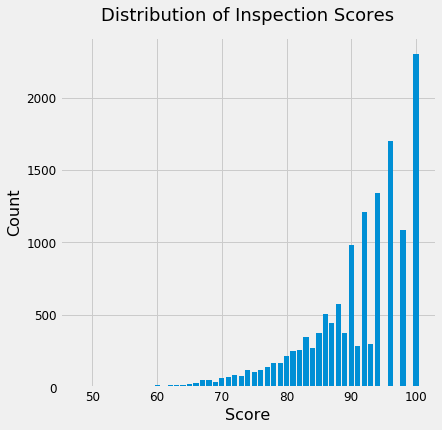

In [280]:
score_count = ins['score'].value_counts().to_frame('count')
score_count.index.name = 'score'
score_count = score_count.reset_index()
score_count = score_count.sort_values('count', ascending=True)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
# p1 = sns.barplot('score', 'count', data = score_count, palette='GnBu_d')
plt.bar(score_count['score'], score_count['count'])
# plt.subplots_adjust(left=0.09, bottom=0.26,right=0.95,top=0.95,wspace=0.2,hspace=0.4)
plt.title('Distribution of Inspection Scores', size=18, y=1.03)
plt.xlabel('Score', size=16)
plt.ylabel('Count', size=16)
# ax.tick_params(axis='both', which='major', labelsize=26)
# plt.legend(loc='best', fontsize=26)
# plt.xlim(40, 110)
# plt.ylim(0, 3000)
plt.yticks(size=12)
plt.xticks(np.arange(50, 110, 10), size=12)
pass


### Question 7b

Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

<!--
BEGIN QUESTION
name: q7b
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

The scores roughly starts from 55. The count for score tends to increase with the score increasing. It is asymmetric. There are some gaps in the range of 90-100. It is unusual that the distribution is not normal distribution. The distribution inplies that people tend to give very high score (90-100) and rarely give low score.

### Question 7c

Let's figure out which restaurants had the worst scores ever. Let's start by creating a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address should be given as NaN.

*Hint: Use the merge method to join the `ins` dataframe with the appropriate portion of the `bus` dataframe.*

<!--
BEGIN QUESTION
name: q7c1
points: 1
-->

In [307]:
# https://pandas-docs.github.io/pandas-docs-travis/user_guide/merging.html
ins_named = pd.merge(ins, bus.loc[:, ['business_id', 'name', 'address']], how='left', on=['business_id'])
# ins_named_rank = ins_named.sort_values('score', ascending=True)
# display(ins_named_rank.head())
# display(ins_named_rank.tail(20))
ins_named.head()


,business_id,score,date,type,new_date,year,name,address
0,19,94,20160513,routine,2016-05-13,2016,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
1,19,94,20171211,routine,2017-12-11,2017,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
2,24,98,20171101,routine,2017-11-01,2017,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
3,24,98,20161005,routine,2016-10-05,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
4,24,96,20160311,routine,2016-03-11,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"


In [308]:
ok.grade("q7c1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Using this data frame, identify the restaurant with the lowest inspection scores ever. Head to yelp.com and look up the reviews page for this restaurant. Copy and paste anything interesting you want to share.

<!--
BEGIN QUESTION
name: q7c2
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

The restaurant with the lowest score is "DA CAFE" in 407 CLEMENT ST.
Someone gave really low score like this.

> horrible food! We ordered French toast, special rice wrap with bbq pork, beef tripe and stir fry rice noodle with beef. French toast and rice wrap were average. Beef tripe tastes like wonton wrap, so mushy and a strong sticky smell, feel like it was reheated from someone's leftovers. Just by think, it already feel yikes. The beef from stir fried rice noodle with beef also not fresh. After had this horrible food, we decide to just left them less than 10% tips since we feel the money doesn't worth the food. The waitress came over and yelled at us and demand more $$, we told them the food are not fresh, she said this food suppose to be this! Are you fxxking kidding me?! We were forced to pay more tips, feel like if we don't pay more we can't walk out from this place. Worst experience ever, don't go if there is another restaurant in the world.

However, someone likes it!

> This will literally be my go-to place whenever I'm craving food late night!!! It's super cheap and delicious. The portions are large and it's open late. I wish I found this place earlier, I'd highly recommend it! You can't go wrong with any dish here, I even came here twice in a week because it was such a good deal.   
 
 
 

Just for fun you can also look up the restaurants with the best scores. You'll see that lots of them aren't restaurants at all!

Yep. I found some "restaurants" with 100 scores are "LAFAYETTE ELEMENTARY SCHOOL", "WESTERN SUNSET MARKET", or "W HOTEL SAN FRANCISCO".

---
## 8: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.

### Question 8a

Let's see which restaurant has had the most extreme improvement in its rating. Let the "swing" of a restaurant be defined as the difference between its highest and lowest rating ever. **Only consider restaurants with at least 3 ratings!** Using whatever technique you want to use, assign `max_swing` to the name of restaurant that has the maximum swing.

<!--
BEGIN QUESTION
name: q8a1
points: 2
-->

In [313]:
ins_count = ins['business_id'].value_counts()
ins_count = ins_count[ins_count>=3]
ins_3_ratings = ins[ins['business_id'].isin(ins_count.index)]
# ins.groupby(['business_id']).filter(lambda x: len(x) >= 3)
ins_swing = ins_3_ratings['score'].groupby(ins_3_ratings['business_id']).agg(lambda x: max(x)-min(x))
max_swing = bus[bus['business_id']==ins_swing.idxmax()]['name'].iloc[0]
max_swing

"JOANIE'S DINER INC."

In [270]:
ok.grade("q8a1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 8b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named `count` that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `business_id`, and the second should be on `year`.

An example row in this dataframe might look tell you that business_id is 573, year is 2017, and count is 4.

*Hint: Use groupby to group based on both the `business_id` and the `year`.*

*Hint: Use rename to change the name of the column to `count`.*

<!--
BEGIN QUESTION
name: q8b
points: 2
-->

In [271]:
inspections_by_id_and_year = ins['score'] .groupby([ins['business_id'], ins['year']]).agg(len) 
inspections_by_id_and_year = inspections_by_id_and_year.to_frame('count')
inspections_by_id_and_year.head()

count
business_id year       
19          2016      1
            2017      1
24          2016      2
            2017      1
31          2015      1

In [272]:
ok.grade("q8b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [273]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

### Question 8c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2016 for this problem.

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs ordered chronologically  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows of the resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

The scatter plot should look like this:

<img src="q8c2.png" width=500>

*Note: Each score pair must be a list type; numpy arrays will not pass the autograder.*

*Hint: Use the `filter` method from lecture 3 to create a new dataframe that only contains restaurants that received exactly 2 inspections.*

*Hint: Our answer is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.*

<!--
BEGIN QUESTION
name: q8c1
points: 3
-->

In [320]:
# Create the dataframe here
ins_rank_w_date = ins.sort_values('new_date', ascending=True)
ins_2_score_a_year = ins_rank_w_date.groupby(['business_id', 'year']).filter(lambda x: len(x)==2)
ins_2_score_a_year = ins_2_score_a_year['score'].groupby([ins_2_score_a_year['business_id'], ins_2_score_a_year['year']]).agg(lambda x: [x.iloc[0], x.iloc[-1]])
ins_2_score_a_year = ins_2_score_a_year.to_frame('score_pair')
scores_pairs_by_business = ins_2_score_a_year.reset_index('year')
scores_pairs_by_business = scores_pairs_by_business[scores_pairs_by_business['year'] == 2016]['score_pair'].to_frame()
scores_pairs_by_business

,score_pair
business_id,
24,"[96, 98]"
45,"[78, 84]"
66,"[98, 100]"
67,"[87, 94]"
76,"[100, 98]"
77,"[91, 96]"
146,"[84, 84]"
217,"[94, 90]"
247,"[83, 86]"


In [275]:
ok.grade("q8c1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now, create your scatter plot in the cell below.
<!--
BEGIN QUESTION
name: q8c2
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

(array([ 50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 6 Text xticklabel objects>)

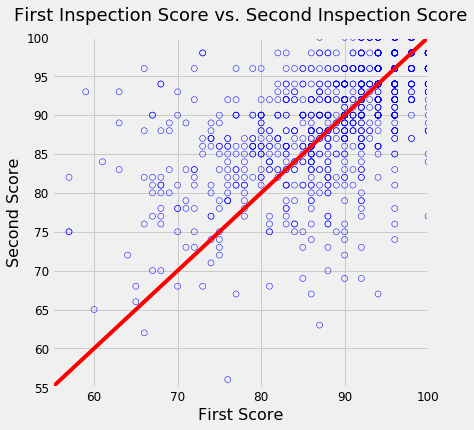

In [293]:
first_score = [x[0] for x in list(scores_pairs_by_business['score_pair'])]
second_score = [x[1] for x in list(scores_pairs_by_business['score_pair'])]   
# plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
p1 = plt.scatter(x=first_score, y=second_score, marker='o',facecolors='none', edgecolors='b')
p2 = plt.plot([55, 100], [55, 100], '-r')
# plt.subplots_adjust(left=0.09, bottom=0.26,right=0.95,top=0.95,wspace=0.2,hspace=0.4)
plt.title('First Inspection Score vs. Second Inspection Score', size=18, y=1.03)
plt.xlabel('First Score', size=16)
plt.ylabel('Second Score', size=16)
# ax.tick_params(axis='both', which='major', labelsize=26)
# plt.legend(loc='best', fontsize=26)
plt.xlim(55, 100)
plt.ylim(55, 100)
plt.yticks(size=12)
plt.xticks(size=12)

### Question 8d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

<img src="q8d.png" width=500>

*Hint: Use `second_score` and `first_score` created in the scatter plot code above.*

*Hint: Convert the scores into numpy arrays to make them easier to deal with.*

*Hint: Try changing the number of bins when you call plt.hist.*

<!--
BEGIN QUESTION
name: q8d
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Count')

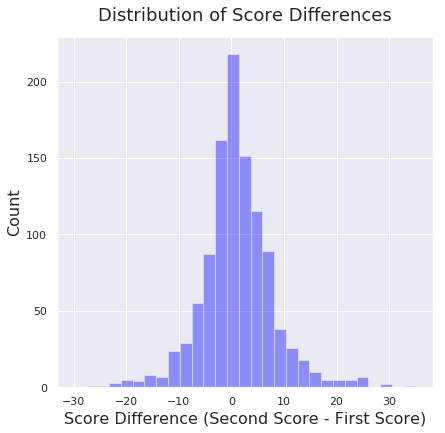

In [335]:
scores_list_by_business = scores_pairs_by_business.copy()
scores_list_by_business['first score'] = \
    scores_list_by_business['score_pair'].apply(lambda x: x[0])
scores_list_by_business['second score'] = \
    scores_list_by_business['score_pair'].apply(lambda x: x[1])
scores_list_by_business['score difference'] = \
    scores_list_by_business['score_pair'].apply(lambda x: x[1] - x[0])
# display(scores_list_by_business.head())

# plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
p3 = sns.distplot(scores_list_by_business['score difference'], \
                  bins=np.linspace(-30, 35, 30), kde=False, color='blue')
# p3 = plt.hist(scores_list_by_business['score difference'], bins=np.linspace(-30, 35, 30))
# plt.subplots_adjust(left=0.09, bottom=0.26,right=0.95,top=0.95,wspace=0.2,hspace=0.4)
plt.title('Distribution of Score Differences', size=18, y=1.03)
plt.xlabel('Score Difference (Second Score - First Score)', size=16)
plt.ylabel('Count', size=16)
# ax.tick_params(axis='both', which='major', labelsize=26)
# plt.legend(loc='best', fontsize=26)
# plt.xlim(55, 100)
# plt.ylim(55, 100)
# plt.yticks(size=12)
# plt.xticks(size=12)



### Question 8e

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 8c? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 8d? What do you see?

<!--
BEGIN QUESTION
name: q8e
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

1. In the scatter plot, I expect to see the the scattered point should be above the line y=x if the score improves. However, what I see in the actual plot is that the number of data points above y=x and that bolow y=x are nearly the same, which means only half of the score improves and the rest half got even worse.

2. In the histogram, if a restaurant's score improves, the data point should be "in" a bar corresponding to posive value of score difference. Morere scores improve, more bars and higher bars in the right side of 0. However, what I actaully see is that the distribution of the bars in the left side of 0 and in the right side of 0 are similar, which means only half of the score improves and the rest half got even worse.

## Summary of the Inspections Data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that many restaurants have more than one inspection a year. 
* By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
* We identified the restaurant that had the largest swing in rating over time.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and may warrant further investigation. 


## Congratulations!

You are finished with Project 1. You'll need to make sure that your PDF exports correctly to receive credit. Run the following cell and follow the instructions.

In [317]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj1.ipynb', 'proj1.pdf')
ok.submit()

Generating PDF...
Saved proj1.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj1.ipynb'.
Submit... 100% complete
Submission successful for user: tanjin_he@berkeley.edu
URL: https://okpy.org/cal/data100/sp19/proj1/submissions/0YgjqG

